In [3]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py
import scipy.io
import os
os.getcwd()

'C:\\Users\\rahim035\\DNNs_SV'

In [4]:
f = h5py.File("Dic_CPR_ocean.mat",'r')
list(f.keys())

['X_ocean_trn_detection',
 'X_ocean_trn_retrieval',
 'X_ocean_tst_detection',
 'X_ocean_tst_retrieval',
 'y_ocean_trn_detection',
 'y_ocean_trn_retrieval',
 'y_ocean_tst_detection',
 'y_ocean_tst_retrieval']

In [5]:
X0_trn_detection = f['X_ocean_trn_detection']
y0_trn_detection = f['y_ocean_trn_detection']
X0_tst_detection = f['X_ocean_tst_detection']
y0_tst_detection = f['y_ocean_tst_detection']

X0_trn_retrieval = f['X_ocean_trn_retrieval']
y0_trn_retrieval = f['y_ocean_trn_retrieval']
X0_tst_retrieval = f['X_ocean_tst_retrieval']
y0_tst_retrieval = f['y_ocean_tst_retrieval']

In [6]:
X1_trn_detection = np.transpose(X0_trn_detection)
X1_tst_detection = np.transpose(X0_tst_detection)
y_trn_detection = np.transpose(y0_trn_detection)
y_tst_detection = np.transpose(y0_tst_detection)

X1_trn_retrieval = np.transpose(X0_trn_retrieval)
X1_tst_retrieval = np.transpose(X0_tst_retrieval)
y_trn_retrieval = np.transpose(y0_trn_retrieval)
y_tst_retrieval = np.transpose(y0_tst_retrieval)

In [7]:
X1_trn_detection.astype('float64')
X1_tst_detection.astype('float64')
y_trn_detection.astype('int64')
y_tst_detection.astype('int64')

X1_trn_retrieval.astype('float64')
X1_tst_retrieval.astype('float64')
y_trn_retrieval.astype('float64')
y_tst_retrieval.astype('float64');

In [8]:
mean_detection = X1_trn_detection.mean(axis=0)
X2_trn_detection = X1_trn_detection-mean_detection
std_detection = X1_trn_detection.std(axis=0)
X_trn_detection = X2_trn_detection/std_detection
X2_tst_detection = X1_tst_detection-mean_detection
X_tst_detection = X2_tst_detection/std_detection

mean_retrieval = X1_trn_retrieval.mean(axis=0)
X2_trn_retrieval = X1_trn_retrieval-mean_retrieval
std_retrieval = X1_trn_retrieval.std(axis=0)
X_trn_retrieval = X2_trn_retrieval/std_retrieval
X2_tst_retrieval = X1_tst_retrieval-mean_retrieval
X_tst_retrieval = X2_tst_retrieval/std_retrieval

In [9]:
print('***Training Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_train = np.zeros([y_trn_detection.shape[0],1])

for i in range(len(X_trn_detection)):
    label = y_trn_detection[i]
    if label==5:
        n_snow+=1
        t_train[i]=2
    if label==3:
        n_rain+=1  
        t_train[i]=1
    if label==0:
        n_clear+=1
        t_train[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Testing Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_test = np.zeros([y_tst_detection.shape[0],1])

for i in range(len(X_tst_detection)):
    label = y_tst_detection[i]
    if label==5:
        n_snow+=1
        t_test[i]=2
    if label==3:
        n_rain+=1  
        t_test[i]=1
    if label==0:
        n_clear+=1
        t_test[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

***Training Dataset:

Num. of snowfall: 39225
Num. of rainfall: 39117
Num. of clear-sky: 78384

***Testing Dataset:

Num. of snowfall: 16734
Num. of rainfall: 16866
Num. of clear-sky: 33569


In [10]:
from tensorflow.keras.utils import to_categorical

t_trn_detection = to_categorical(t_train)
t_tst_detection = to_categorical(t_test)

## DNN - Detection Module

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, Sequential

In [12]:
# Parameters
hidden_units = 30
dropout = 0

# Detection Module
model_detection = Sequential()

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(3))
model_detection.add(Activation('softmax'))

In [13]:
model_detection.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics= [tf.keras.metrics.Recall()])

In [14]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True,
    )    
]

In [15]:
print('\nFitting DNN (Detection Module):\n')
batch_size1 = 500
history_detection = model_detection.fit(X_trn_detection, t_trn_detection, epochs=400,
                                validation_split=.2, batch_size = batch_size1,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Detection Module):

Epoch 1/400
251/251 [==============================] - 1s 4ms/step - loss: 0.9023 - recall: 0.1518 - val_loss: 0.6722 - val_recall: 0.6543
Epoch 2/400
251/251 [==============================] - 1s 3ms/step - loss: 0.4911 - recall: 0.7967 - val_loss: 0.3790 - val_recall: 0.8465
Epoch 3/400
251/251 [==============================] - 1s 3ms/step - loss: 0.3442 - recall: 0.8612 - val_loss: 0.3129 - val_recall: 0.8725
Epoch 4/400
251/251 [==============================] - 1s 3ms/step - loss: 0.2937 - recall: 0.8822 - val_loss: 0.2738 - val_recall: 0.8901
Epoch 5/400
251/251 [==============================] - 1s 3ms/step - loss: 0.2652 - recall: 0.8941 - val_loss: 0.2539 - val_recall: 0.8985
Epoch 6/400
251/251 [==============================] - 1s 3ms/step - loss: 0.2501 - recall: 0.9007 - val_loss: 0.2429 - val_recall: 0.9015
Epoch 7/400
251/251 [==============================] - 1s 3ms/step - loss: 0.2403 - recall: 0.9044 - val_loss: 0.2357 - val_recall: 

251/251 [==============================] - 1s 3ms/step - loss: 0.1787 - recall: 0.9284 - val_loss: 0.1804 - val_recall: 0.9278
Epoch 117/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1787 - recall: 0.9282 - val_loss: 0.1812 - val_recall: 0.9275
Epoch 118/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1785 - recall: 0.9283 - val_loss: 0.1857 - val_recall: 0.9244
Epoch 119/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1786 - recall: 0.9285 - val_loss: 0.1800 - val_recall: 0.9278
Epoch 120/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1783 - recall: 0.9285 - val_loss: 0.1802 - val_recall: 0.9277
Epoch 121/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1782 - recall: 0.9286 - val_loss: 0.1813 - val_recall: 0.9271
Epoch 122/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1781 - recall: 0.9283 - val_loss: 0.1805 - val_recall: 0.9277
Epoch 123/400
251/251 [====

251/251 [==============================] - 1s 3ms/step - loss: 0.1739 - recall: 0.9306 - val_loss: 0.1782 - val_recall: 0.9292
Epoch 175/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1737 - recall: 0.9304 - val_loss: 0.1777 - val_recall: 0.9297
Epoch 176/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1737 - recall: 0.9304 - val_loss: 0.1759 - val_recall: 0.9301
Epoch 177/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1738 - recall: 0.9302 - val_loss: 0.1766 - val_recall: 0.9302
Epoch 178/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1736 - recall: 0.9302 - val_loss: 0.1758 - val_recall: 0.9302
Epoch 179/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1735 - recall: 0.9305 - val_loss: 0.1771 - val_recall: 0.9305
Epoch 180/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1734 - recall: 0.9305 - val_loss: 0.1764 - val_recall: 0.9295
Epoch 181/400
251/251 [====

Epoch 232/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1703 - recall: 0.9316 - val_loss: 0.1748 - val_recall: 0.9316
Epoch 233/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1700 - recall: 0.9321 - val_loss: 0.1736 - val_recall: 0.9315
Epoch 234/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1701 - recall: 0.9318 - val_loss: 0.1736 - val_recall: 0.9320
Epoch 235/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1699 - recall: 0.9320 - val_loss: 0.1748 - val_recall: 0.9312
Epoch 236/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1699 - recall: 0.9318 - val_loss: 0.1737 - val_recall: 0.9317
Epoch 237/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1700 - recall: 0.9318 - val_loss: 0.1727 - val_recall: 0.9318
Epoch 238/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1700 - recall: 0.9317 - val_loss: 0.1735 - val_recall: 0.9314
Epoch 239/400

Epoch 290/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1677 - recall: 0.9328 - val_loss: 0.1722 - val_recall: 0.9322
Epoch 291/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1675 - recall: 0.9330 - val_loss: 0.1716 - val_recall: 0.9337
Epoch 292/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1676 - recall: 0.9325 - val_loss: 0.1725 - val_recall: 0.9322
Epoch 293/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1676 - recall: 0.9327 - val_loss: 0.1724 - val_recall: 0.9322
Epoch 294/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1674 - recall: 0.9325 - val_loss: 0.1726 - val_recall: 0.9318
Epoch 295/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1674 - recall: 0.9326 - val_loss: 0.1713 - val_recall: 0.9336
Epoch 296/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1674 - recall: 0.9328 - val_loss: 0.1711 - val_recall: 0.9328
Epoch 297/400

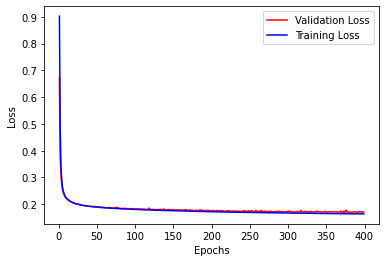

In [17]:
import matplotlib.pyplot as plt

val_loss = history_detection.history["val_loss"]
loss = history_detection.history["loss"]

epochs = range(1, 400)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [18]:
predictions_label = model_detection.predict(X_tst_detection)

In [19]:
y_pred = np.zeros([len(X_tst_detection),1])
for i in range(len(X_tst_detection)):
    y_pred[i,0] = np.argmax(predictions_label[i])

### Metrics

In [20]:
### Detection Module

n_cc=1
n_cs=1
n_cr=1
n_sc=1
n_ss=1
n_sr=1
n_rc=1
n_rs=1
n_rr=1

precip_c= 0
precip_r= 1
precip_s= 2

for i in range(len(X_tst_detection)):
    label_predict = y_pred[i]
    label_actual = t_test[i]
    if label_predict==precip_c and label_actual==precip_c:
        n_cc+=1
    if label_predict==precip_s and label_actual==precip_s:
        n_ss+=1
    if label_predict==precip_r and label_actual==precip_r:
        n_rr+=1 
    if label_predict==precip_c and label_actual==precip_s:
        n_cs+=1
    if label_predict==precip_c and label_actual==precip_r:
        n_cr+=1
    if label_predict==precip_s and label_actual==precip_c:
        n_sc+=1
    if label_predict==precip_s and label_actual==precip_r:
        n_sr+=1  
    if label_predict==precip_r and label_actual==precip_c:
        n_rc+=1
    if label_predict==precip_r and label_actual==precip_s:
        n_rs+=1        
        
#Snow
TP_s = n_ss
TN_s = n_cc+n_cr+n_rc+n_rr
FP_s = n_sc+n_sr
FN_s = n_cs+n_rs

precision_s = TP_s/(TP_s+FP_s)
acc_s = (TP_s+TN_s)/(TP_s+TN_s+FP_s+FN_s)
recall_s = TP_s/(TP_s+FN_s)
f1_score_s = (2*precision_s*recall_s)/(precision_s+recall_s)
FPR_s = FP_s/(FP_s+TN_s)

#Rain
TP_r = n_rr
TN_r = n_cc+n_cs+n_sc+n_ss
FP_r = n_rc+n_rs
FN_r = n_cr+n_sr

precision_r = TP_r/(TP_r+FP_r)
acc_r = (TP_r+TN_r)/(TP_r+TN_r+FP_r+FN_r)
recall_r = TP_r/(TP_r+FN_r)
f1_score_r = (2*precision_r*recall_r)/(precision_r+recall_r)
FPR_r = FP_r/(FP_r+TN_r) 

print('\n For Rainfall Detection Over Ocean:\n')
print('Precision: ',precision_r)
print('Accuracy: ',acc_r)
print('Recall (TPR): ',recall_r)
print('False Alarm (FPR): ',FPR_r)
print('\nF1 Score: ',f1_score_r)

print('----------------------------')
print('\n For Snwofall Detection Over Ocean:\n')
print('Precision: ',precision_s)
print('Accuracy: ',acc_s)
print('Recall (TPR): ',recall_s)
print('False Alarm (FPR): ',FPR_s)
print('\nF1 Score: ',f1_score_s)

#Model
TP = n_cc+n_ss+n_rr
FP = n_cs+n_cr+n_sc+n_sr+n_rc+n_rs
FN = n_sc+n_rc+n_cs+n_rs+n_cr+n_sr

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2*precision*recall)/(precision+recall)

print('----------------------------')
print('\n For Model Detection Over Ocean:\n')
print('Precision: ',precision)
print('Recall (TPR): ',recall)
print('\nF1 Score: ',f1_score)


 For Rainfall Detection Over Ocean:

Precision:  0.9122570826504331
Accuracy:  0.9585857834015631
Recall (TPR):  0.9239388190656865
False Alarm (FPR):  0.029797046136720535

F1 Score:  0.9180607917059378
----------------------------

 For Snwofall Detection Over Ocean:

Precision:  0.9280013779640581
Accuracy:  0.9728023818384816
Recall (TPR):  0.9657624282982792
False Alarm (FPR):  0.02486171414976506

F1 Score:  0.9465054314408692
----------------------------

 For Model Detection Over Ocean:

Precision:  0.9314774841831038
Recall (TPR):  0.9314774841831038

F1 Score:  0.9314774841831038


In [21]:
model_detection.evaluate(X_tst_detection, t_tst_detection, batch_size = batch_size1)

135/135 [==============================] - 0s 517us/step - loss: 0.1702 - recall: 0.9315


[0.17021916806697845, 0.9315129518508911]

## DNN - Retrieval Module

In [22]:
from tensorflow.keras import backend
def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred-y_true)))
    
def mean_absolute_error(y_true, y_pred):
        return backend.mean(backend.abs(y_pred-y_true))        

### Snow

In [23]:
# Parameters
hidden_units = 60
dropout = 0

# OCEAN
model_retrieval = Sequential()

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(1))
model_retrieval.add(Activation('relu'))

In [24]:
model_retrieval.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = root_mean_squared_error,
              metrics= mean_absolute_error)

In [25]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [26]:
print('\nFitting DNN (Retrieval Module - Snow):\n')
batch_size2 = 500
history_retrieval = model_retrieval.fit(X_trn_retrieval, y_trn_retrieval, epochs=400,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Snow):

Epoch 1/400
251/251 [==============================] - 1s 3ms/step - loss: 0.1625 - mean_absolute_error: 0.0708 - val_loss: 0.1382 - val_mean_absolute_error: 0.0539
Epoch 2/400
251/251 [==============================] - 1s 2ms/step - loss: 0.1277 - mean_absolute_error: 0.0470 - val_loss: 0.1232 - val_mean_absolute_error: 0.0422
Epoch 3/400
251/251 [==============================] - 1s 2ms/step - loss: 0.1161 - mean_absolute_error: 0.0403 - val_loss: 0.1142 - val_mean_absolute_error: 0.0382
Epoch 4/400
251/251 [==============================] - 1s 2ms/step - loss: 0.1087 - mean_absolute_error: 0.0369 - val_loss: 0.1084 - val_mean_absolute_error: 0.0356
Epoch 5/400
251/251 [==============================] - 1s 2ms/step - loss: 0.1038 - mean_absolute_error: 0.0347 - val_loss: 0.1044 - val_mean_absolute_error: 0.0343
Epoch 6/400
251/251 [==============================] - 1s 2ms/step - loss: 0.1005 - mean_absolute_error: 0.0332 - val_loss: 0.1018 - v

251/251 [==============================] - 0s 2ms/step - loss: 0.0822 - mean_absolute_error: 0.0242 - val_loss: 0.0877 - val_mean_absolute_error: 0.0259
Epoch 100/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0820 - mean_absolute_error: 0.0241 - val_loss: 0.0877 - val_mean_absolute_error: 0.0259
Epoch 101/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0820 - mean_absolute_error: 0.0241 - val_loss: 0.0876 - val_mean_absolute_error: 0.0259
Epoch 102/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0822 - mean_absolute_error: 0.0241 - val_loss: 0.0876 - val_mean_absolute_error: 0.0258
Epoch 103/400
251/251 [==============================] - 0s 2ms/step - loss: 0.0819 - mean_absolute_error: 0.0241 - val_loss: 0.0879 - val_mean_absolute_error: 0.0258
Epoch 104/400
251/251 [==============================] - 0s 2ms/step - loss: 0.0821 - mean_absolute_error: 0.0241 - val_loss: 0.0877 - val_mean_absolute_error: 0.0262
Epoch 105/40

251/251 [==============================] - 1s 2ms/step - loss: 0.0799 - mean_absolute_error: 0.0233 - val_loss: 0.0870 - val_mean_absolute_error: 0.0254
Epoch 198/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0801 - mean_absolute_error: 0.0233 - val_loss: 0.0869 - val_mean_absolute_error: 0.0255
Epoch 199/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0800 - mean_absolute_error: 0.0232 - val_loss: 0.0869 - val_mean_absolute_error: 0.0254
Epoch 200/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0800 - mean_absolute_error: 0.0233 - val_loss: 0.0870 - val_mean_absolute_error: 0.0254
Epoch 201/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0801 - mean_absolute_error: 0.0233 - val_loss: 0.0871 - val_mean_absolute_error: 0.0253
Epoch 202/400
251/251 [==============================] - 1s 2ms/step - loss: 0.0797 - mean_absolute_error: 0.0232 - val_loss: 0.0871 - val_mean_absolute_error: 0.0253
Epoch 203/40

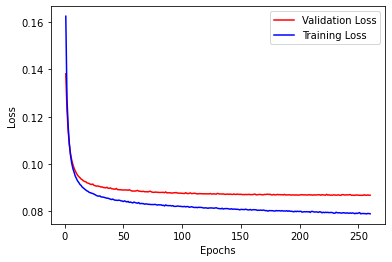

In [28]:
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 261)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [30]:
predictions_snow = model_retrieval.predict(X_tst_retrieval)

### Evaluation

In [31]:
model_retrieval.evaluate(X_tst_retrieval, y_tst_retrieval, batch_size = batch_size2)

135/135 [==============================] - 0s 702us/step - loss: 0.0958 - mean_absolute_error: 0.0280


[0.09576115757226944, 0.028010044246912003]

# Checking Outputs

In [32]:
from scipy.stats import gaussian_kde
x = y_tst_retrieval
y = predictions_snow
idx_snow = (x>0) & (y[:]>0)
mask_TP=idx_snow[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [36]:
len(x)

16350

In [38]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(x-y)/len(x)
print('RMSE snow:', rmse, 'mm/hr')
print('MAE snow:', mae, 'mm/hr')
print('bias snow:', bias, 'mm/hr')

RMSE snow: 0.18589862992736816 mm/hr
MAE snow: 0.10035385056282038 mm/hr
bias snow: 0.01607710629302883 mm/hr


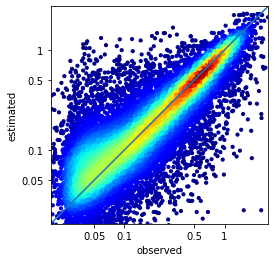

In [33]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-4, 1], [-4, 1])
ax.set_xlim(-4, 1)
ax.set_ylim(-4, 1)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.05), np.log(0.1), np.log(0.5), np.log(1)])
ax.set_xticklabels(['0.05','0.1','0.5', '1'])
ax.set_yticks([np.log(0.05),np.log(0.1), np.log(0.5), np.log(1)])
ax.set_yticklabels(['0.05','0.1','0.5', '1'])
plt.xlabel('observed')
plt.ylabel('estimated')
plt.show()

In [28]:
model_detection.save('Models\CPR\Ocean\model_dtc',save_format='h5')
model_retrieval.save('Models\CPR\Ocean\model_snow',save_format='h5')

In [29]:
import scipy
from scipy.io import savemat

fp_CPR_ocean = 'Models/CPR/Ocean/files_CPR_ocean.mat'
scipy.io.savemat(fp_CPR_ocean, {'mean_detection_CPR_ocean': mean_detection,'std_detection_CPR_ocean':std_detection,
                               'mean_snow_retrieval_CPR_ocean': mean_retrieval,'std_snow_retrieval_CPR_ocean':std_retrieval})

## Save Files

In [ ]:
import scipy
from scipy.io import savemat

fp_DNN_detection = 'label_pred_ocean_CPR.mat'
fp_actual_detection = 't_test_label_ocean_CPR.mat'
scipy.io.savemat(fp_DNN_detection, {'label_pred_ocean_CPR': y_pred})
scipy.io.savemat(fp_actual_detection, {'t_test_label_ocean_CPR': t_test})

fp_DNN_retrieval = 'rate_pred_ocean_CPR.mat'
fp_actual_retrieval = 't_test_rate_ocean_CPR.mat'
scipy.io.savemat(fp_DNN_retrieval, {'rate_pred_ocean_CPR': predictions_snow})
scipy.io.savemat(fp_actual_retrieval, {'t_test_rate_ocean_CPR': y_tst_retrieval})

## Observation Orbits

In [ ]:
g = h5py.File("Orbital/Orbit3080_dics.mat",'r')
list(g.keys())

In [ ]:
X0_detection = g['X_detection']
X1_detection = np.transpose(X0_detection)
X2_detection = np.transpose(X1_detection)

X0_retrieval = g['x_retrieval_CPR_ocean']
X1_retrieval = np.transpose(X0_retrieval)

In [ ]:
X3_detection = X2_detection-mean_detection
X_detection = X3_detection/std_detection

X2_retrieval = X1_retrieval-mean_retrieval
X_retrieval = X2_retrieval/std_retrieval

In [ ]:
label_pred_obs = model_detection.predict(X_detection)

In [ ]:
y_pred_obs = np.zeros([len(X_detection),1])
for i in range(len(X_detection)):
    y_pred_obs[i,0] = np.argmax(label_pred_obs[i])

In [ ]:
rate_pred_obs = model_retrieval.predict(X_retrieval)

In [ ]:
import scipy
from scipy.io import savemat

fp_detection = 'label_pred_ocean_CPR_6308.mat'
fp_retrieval = 'rate_pred_ocean_CPR_6308.mat'
scipy.io.savemat(fp_detection, {'label_pred_ocean_CPR': y_pred_obs})
scipy.io.savemat(fp_retrieval, {'rate_pred_ocean_CPR': rate_pred_obs})                          

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
CPR_ocean = model_detection.to_json()
with open("CPR_ocean.json", "w") as json_file:
    json_file.write(CPR_ocean)
# serialize weights to HDF5
model_detection.save_weights("model_detection_CPR_ocean.h5")
print("Saved model to disk")
 
# load json and create model
json_file = open('CPR_ocean.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_detection_CPR_ocean = model_from_json(loaded_model_json)
# load weights into new model
model_detection_CPR_ocean.load_weights("model_detection_CPR_ocean.h5")
print("Loaded model from disk")

In [ ]:
model_detection_CPR_ocean.summary()